In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
# Main disagnostic output
ecco = xr.open_zarr('/mnt/efs/data/ecco/zarr/eccov4r3_output/')

In [3]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [4]:
dif_ConvFw = budgFw.sel(term='tendFw') - budgFw.sel(term='totalFw')
budgFw = xr.concat([budgFw, dif_ConvFw.assign_coords(term='dif_ConvFw')], dim='term')

In [5]:
budgFw = budgFw.isel(time=slice(1, -1))
budgH = budgH.isel(time=slice(1, -1))

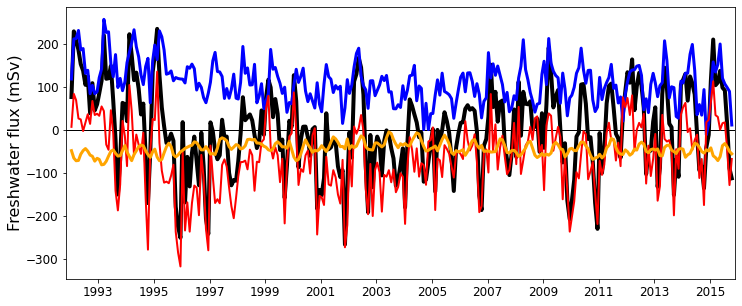

In [17]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='tendFw')*1e3, lw=4, color='black', label='Tendency')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='forcFw')*1e3, lw=3, color='blue', label='Forcing')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='adv_ConvFw')*1e3, lw=2, color='red',label='Advection')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='dif_ConvFw')*1e3, lw=3, color='orange',label='Diffusion')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Freshwater flux (mSv)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#plt.savefig('/mnt/efs/figure.png')
plt.show()

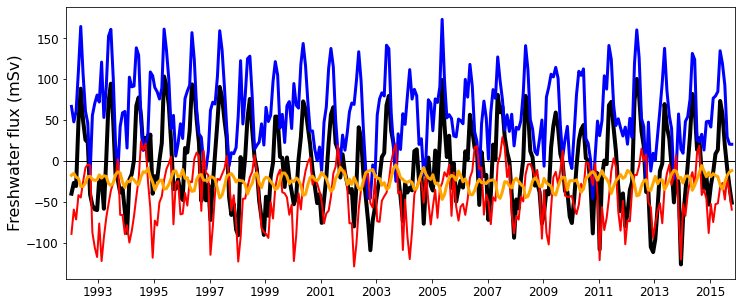

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='tendFw')*1e3, lw=4, color='black', label='Tendency')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='forcFw')*1e3, lw=3, color='blue', label='Forcing')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='adv_ConvFw')*1e3, lw=2, color='red',label='Advection')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='dif_ConvFw')*1e3, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Freshwater flux (mSv)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#plt.savefig('/mnt/efs/figure.png')
plt.show()

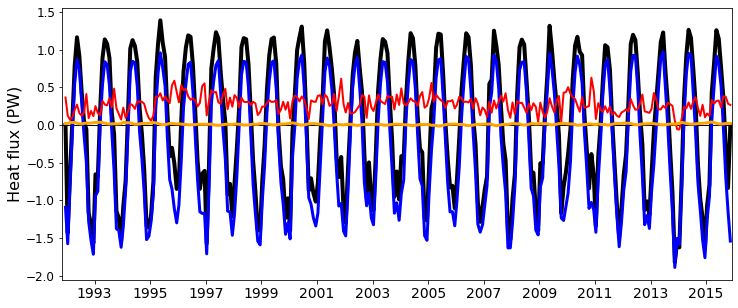

In [26]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='spna',term='tendH')*1e-15, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='spna',term='forcH')*1e-15, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_ConvH')*1e-15, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='spna',term='dif_ConvH')*1e-15, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat flux (PW)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

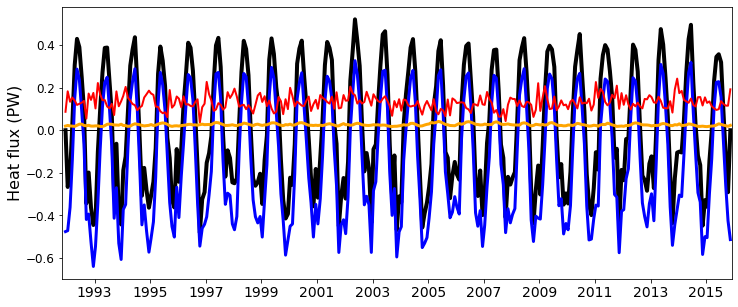

In [5]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='nsea',term='tendH')*1e-15, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='nsea',term='forcH')*1e-15, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='nsea',term='adv_ConvH')*1e-15, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='nsea',term='dif_ConvH')*1e-15, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat flux (PW)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

### With legend

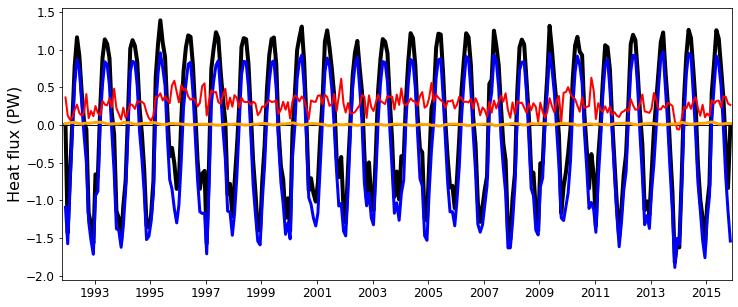

In [27]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='spna',term='tendH')*1e-15, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='spna',term='forcH')*1e-15, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_ConvH')*1e-15, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='spna',term='dif_ConvH')*1e-15, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat flux (PW)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.9, 1.15), ncol=4, fontsize=16)

#plt.savefig('/mnt/efs/figure.png')
plt.show()

### Integrated

In [6]:
budgFw_anom = budgFw.groupby('time.month') - budgFw.groupby('time.month').mean('time')
budgH_anom = budgH.groupby('time.month') - budgH.groupby('time.month').mean('time')\

In [7]:
budgFw_int = (budgFw_anom*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
budgH_int = (budgH_anom*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')

In [8]:
budgFw = budgFw_int - budgFw_int.mean('time')
budgH = budgH_int - budgH_int.mean('time')

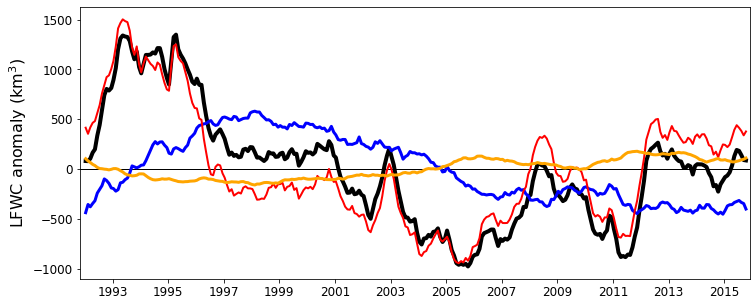

In [9]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw.time, budgFw.sel(region='lsea',term='tendFw')*1e-3, lw=4, color='black', label='Tendency')
ax.plot(budgFw.time, budgFw.sel(region='lsea',term='forcFw')*1e-3, lw=3, color='blue', label='Forcing')
ax.plot(budgFw.time, budgFw.sel(region='lsea',term='adv_ConvFw')*1e-3, lw=2, color='red',label='Advection')
ax.plot(budgFw.time, budgFw.sel(region='lsea',term='dif_ConvFw')*1e-3, lw=3, color='orange',label='Diffusion')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

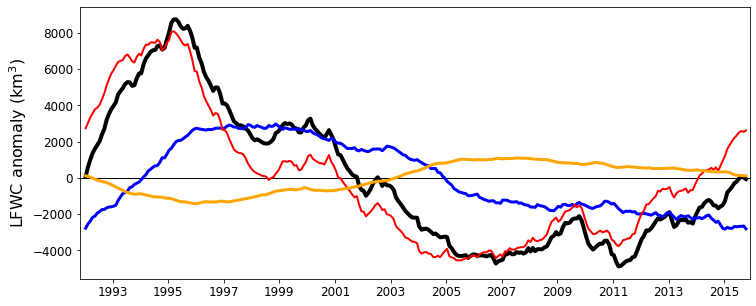

In [27]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='tendFw')*1e-3, lw=4, color='black', label='Tendency')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='forcFw')*1e-3, lw=3, color='blue', label='Forcing')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='adv_ConvFw')*1e-3, lw=2, color='red',label='Advection')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='dif_ConvFw')*1e-3, lw=3, color='orange',label='Diffusion')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

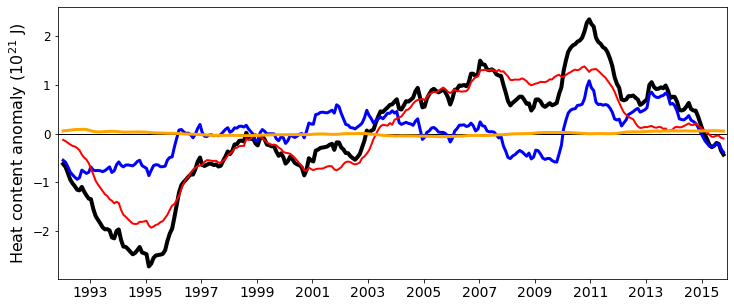

In [10]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='lsea',term='tendH')*1e-21, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='lsea',term='forcH')*1e-21, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='lsea',term='adv_ConvH')*1e-21, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='lsea',term='dif_ConvH')*1e-21, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

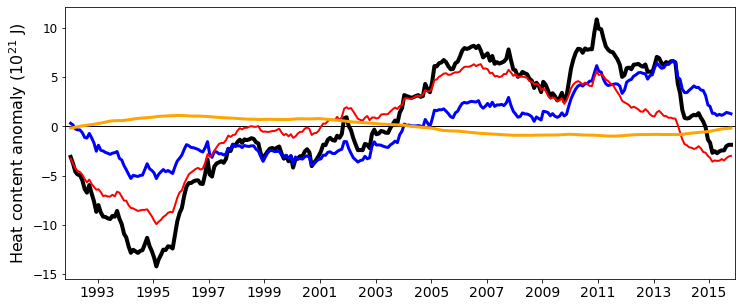

In [31]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='spna',term='tendH')*1e-21, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='spna',term='forcH')*1e-21, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_ConvH')*1e-21, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='spna',term='dif_ConvH')*1e-21, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

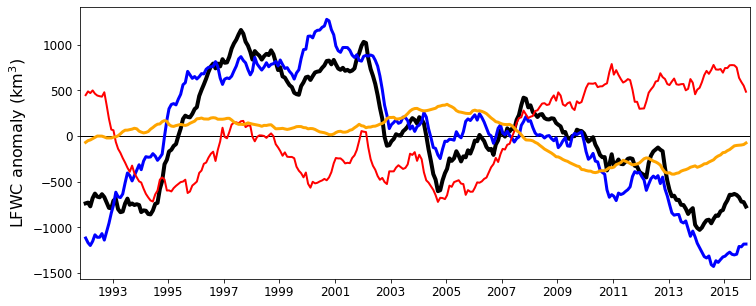

In [32]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='tendFw')*1e-3, lw=4, color='black', label='Tendency')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='forcFw')*1e-3, lw=3, color='blue', label='Forcing')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='adv_ConvFw')*1e-3, lw=2, color='red',label='Advection')
ax.plot(budgFw.time, budgFw.sel(region='nsea',term='dif_ConvFw')*1e-3, lw=3, color='orange',label='Diffusion')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

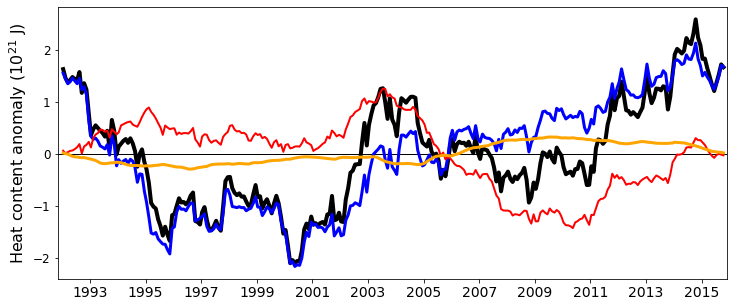

In [33]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='nsea',term='tendH')*1e-21, lw=4, color='black', label='Tendency')
ax.plot(budgH.time, budgH.sel(region='nsea',term='forcH')*1e-21, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='nsea',term='adv_ConvH')*1e-21, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='nsea',term='dif_ConvH')*1e-21, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.show()

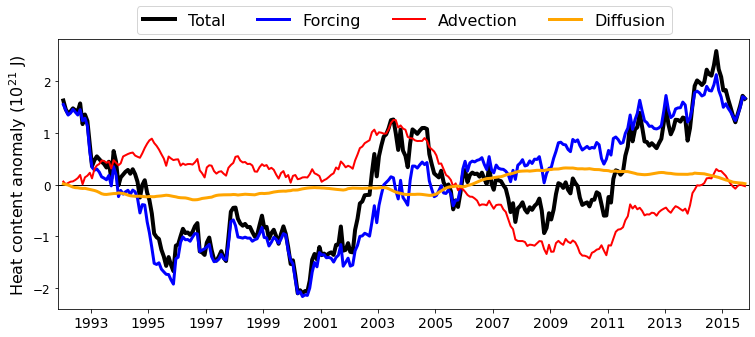

In [35]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='nsea',term='tendH')*1e-21, lw=4, color='black', label='Total')
ax.plot(budgH.time, budgH.sel(region='nsea',term='forcH')*1e-21, lw=3, color='blue', label='Forcing')
ax.plot(budgH.time, budgH.sel(region='nsea',term='adv_ConvH')*1e-21, lw=2, color='red',label='Advection')
ax.plot(budgH.time, budgH.sel(region='nsea',term='dif_ConvH')*1e-21, lw=3, color='orange',label='Diffusion')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.9, 1.15), ncol=4, fontsize=16)

plt.savefig('/mnt/efs/figure.png')
plt.show()

In [9]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_anom_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_anom_heat.nc').budgH

In [10]:
budgFw_int = (budgFw.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
budgH_int = (budgH.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')

In [11]:
budgFw = budgFw_int - budgFw_int.mean('time')
budgH = budgH_int - budgH_int.mean('time')

In [12]:
flx = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_fw.nc')
nc = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_heat.nc')
flx['heat'] = nc.heat

In [13]:
flx_anom = flx.groupby('time.month') - flx.groupby('time.month').mean('time')
flx_int = (flx_anom.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
flx_int['time'] = ecco.time.isel(time=slice(1, -1))
flx_anom = flx_int - flx_int.mean('time')

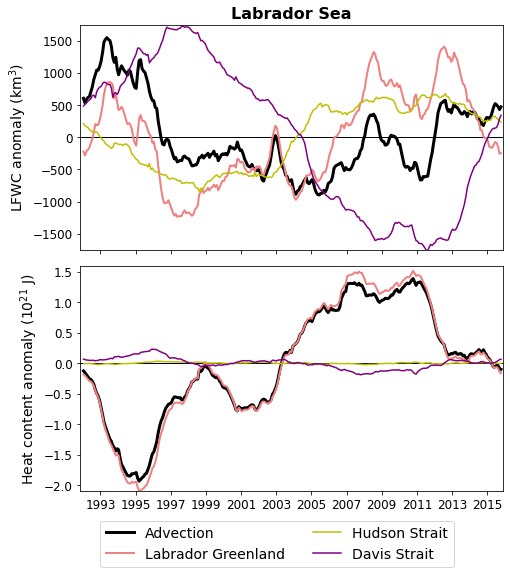

In [23]:
fig, axs = plt.subplots(2, 1,sharex=True, figsize=(7, 8))

axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0].plot(budgFw.time, budgFw.sel(region='lsea',term='adv_ConvFw')*1e-3, lw=3, color='black', label='Advection')
axs[0].plot(flx_anom.time, flx_anom.sel(section='Labrador Greenland').fw*1e-3, lw=2, color='lightcoral',
              label='Labrador Greenland')
axs[0].plot(flx_anom.time, -flx_anom.sel(section='Hudson Strait').fw*1e-3, lw=1.5, color='y',
              label='Hudson Strait')
axs[0].plot(flx_anom.time, -flx_anom.sel(section='Davis Strait').fw*1e-3, lw=1.5, color='purple',
              label='Davis Strait')
axs[0].set_ylim([-1750,1750])
axs[0].set_yticks(np.arange(-1500,2000,500))
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
axs[0].set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_ylabel('LFWC anomaly (km$^3$)',fontsize=14)
axs[0].set_title(r'Labrador Sea', fontsize=16, fontweight='bold')

axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1].plot(budgH.time, budgH.sel(region='lsea',term='adv_ConvH')*1e-21, lw=3, color='k',label='Advection')
axs[1].plot(flx_anom.time, flx_anom.sel(section='Labrador Greenland').heat*1e-6, lw=2, color='lightcoral',
            label='Labrador Greenland')
axs[1].plot(flx_anom.time, -flx_anom.sel(section='Hudson Strait').heat*1e-6, lw=1.5, color='y',
            label='Hudson Strait')
axs[1].plot(flx_anom.time, -flx_anom.sel(section='Davis Strait').heat*1e-6, lw=1.5, color='purple',
            label='Davis Strait')
axs[1].set_ylim([-2.1,1.6])
axs[1].set_yticks(np.arange(-2.0,2.0,0.5))
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
axs[1].set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=14)

fig.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.96, hspace=0.07)
axs[1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.9, -0.1), ncol=2, fontsize=14)

plt.savefig('/mnt/efs/figure.png')
plt.show()

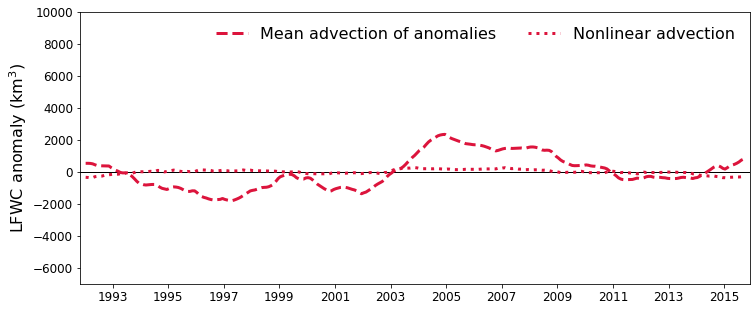

In [34]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
#ax.plot(budgFw.time, budgFw.sel(region='spna',term='tendFw')*1e-3, lw=4, color='black', label='Total')
#ax.plot(budgFw.time, budgFw.sel(region='spna',term='adv_Uanom_FWclim')*1e-3, lw=3, color='crimson',
#        label='Anomalous advection of mean')#
ax.plot(budgFw.time, budgFw.sel(region='spna',term='adv_Uclim_FWanom')*1e-3, lw=3, color='crimson',ls='--',
        label='Mean advection of anomalies')
ax.plot(budgFw.time, budgFw.sel(region='spna',term='adv_Uanom_FWanom')*1e-3, lw=3, color='crimson',ls=':',
        label='Nonlinear advection')
#ax.plot(flx_anom.time, flx_anom.sel(section='Newfoundland Iberia').fw*1e-3, lw=3, color='darkorange',
#        label='Southern boundary flux')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
ax.set_ylim([-7000, 1e4])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
#ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.995, 1.15), ncol=4, fontsize=15)
ax.legend(frameon=False, fancybox=False, bbox_to_anchor=(1, 1), ncol=2, fontsize=16)

plt.savefig('/mnt/efs/figure.png')
plt.show()

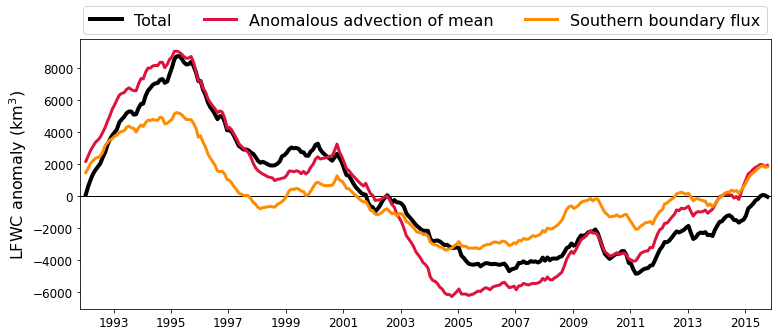

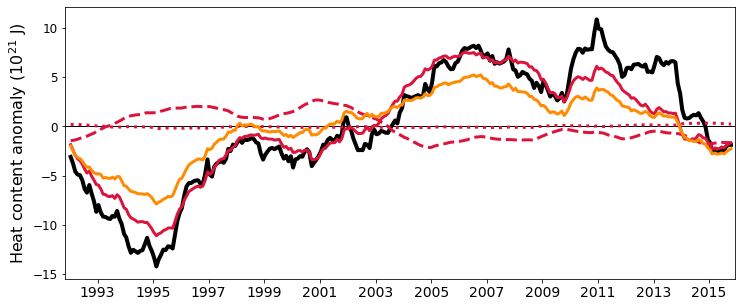

In [36]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgH.time, budgH.sel(region='spna',term='tendH')*1e-21, lw=4, color='black', label='Total')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_Uanom_Tclim')*1e-21, lw=3, color='crimson',
        label='Anomalous advection of mean T/S')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_Uclim_Tanom')*1e-21, lw=3, color='crimson',ls='--',
        label='Mean advection of anomalies')
ax.plot(budgH.time, budgH.sel(region='spna',term='adv_Uanom_Tanom')*1e-21, lw=3, color='crimson',ls=':',
        label='Nonlinear advection')
ax.plot(flx_anom.time, flx_anom.sel(section='Newfoundland Iberia').heat*1e-6, lw=3, color='darkorange',
        label='Southern boundary flux')
ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Heat content anomaly (10$^{21}$ J)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

#fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
#ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.995, 1.15), ncol=4, fontsize=15)

plt.savefig('/mnt/efs/figure.png')
plt.show()

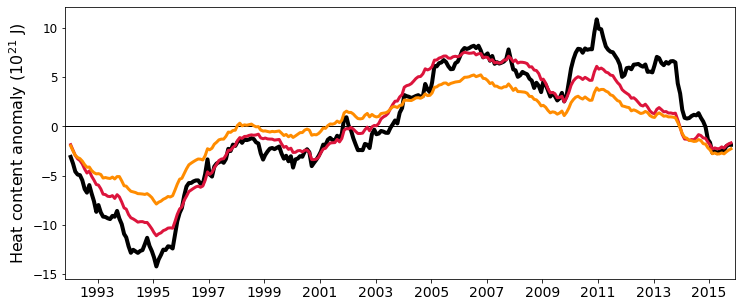

### Freshwater forcing

In [6]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
oceFW = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw_oceFW.nc').fw

In [7]:
budgFw_anom = budgFw.groupby('time.month') - budgFw.groupby('time.month').mean('time')
oceFW_anom = oceFW.groupby('time.month') - oceFW.groupby('time.month').mean('time')

In [8]:
budgFw_int = (budgFw_anom.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
oceFW_int = (oceFW_anom.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')

budgFw_anom = budgFw_int - budgFw_int.mean('time')
oceFW_anom = oceFW_int - oceFW_int.mean('time')

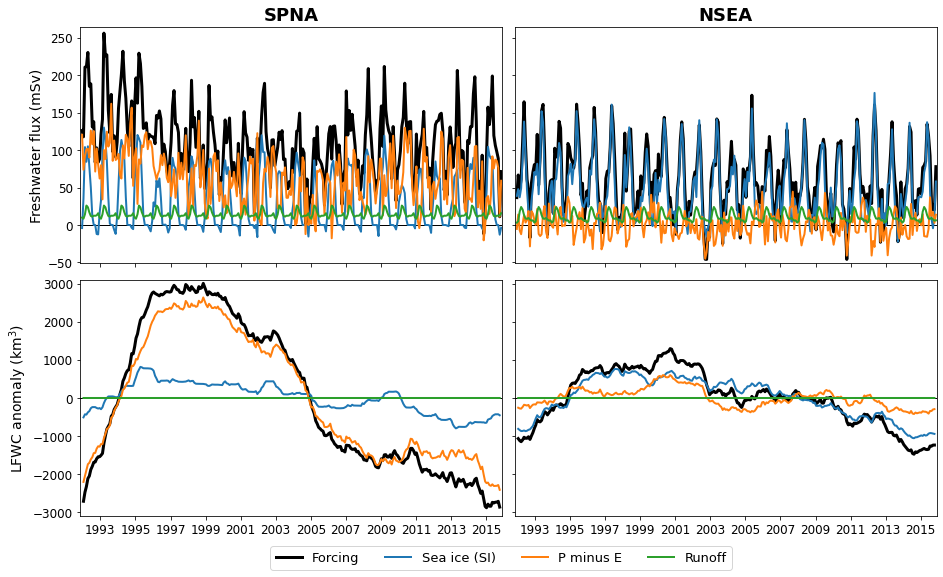

In [57]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(budgFw.time, budgFw.sel(region='spna',term='forcFw')*1e3, lw=3, color='k',label='Forcing')
axs[0,0].plot(oceFW.time, oceFW.sel(region='spna',term='forcFwSI')*1e3, lw=2,label='Sea ice (SI)')
axs[0,0].plot(oceFW.time, oceFW.sel(region='spna',term='forcFwEP')*1e3, lw=2,label='P minus E')
axs[0,0].plot(oceFW.time, oceFW.sel(region='spna',term='forcFwRO')*1e3, lw=2,label='Runoff')
axs[0,0].set_ylim([-51,265])
axs[0,0].set_yticks(np.arange(-50,300,50))
axs[0,0].yaxis.set_tick_params(labelsize=12)
axs[0,0].set_ylabel('Freshwater flux (mSv)',fontsize=14)
axs[0,0].set_title(r'SPNA', fontsize=18, fontweight='bold')

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(budgFw.time, budgFw.sel(region='nsea',term='forcFw')*1e3, lw=3, color='k',label='Forcing')
axs[0,1].plot(oceFW.time, oceFW.sel(region='nsea',term='forcFwSI')*1e3, lw=2,label='Sea ice (SI)')
axs[0,1].plot(oceFW.time, oceFW.sel(region='nsea',term='forcFwEP')*1e3, lw=2,label='P minus E')
axs[0,1].plot(oceFW.time, oceFW.sel(region='nsea',term='forcFwRO')*1e3, lw=2,label='Runoff')
axs[0,1].set_ylim([-51,265])
axs[0,1].set_yticks(np.arange(-50,300,50))
axs[0,1].set_yticklabels([])
axs[0,1].set_title(r'NSEA', fontsize=18, fontweight='bold')

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(budgFw_anom.time,budgFw_anom.sel(region='spna',term='forcFw')*1e-3,lw=3, color='black', label='Forcing')
axs[1,0].plot(oceFW_anom.time, oceFW_anom.sel(region='spna',term='forcFwSI')*1e-3,lw=2, label='Sea ice (SI)')
axs[1,0].plot(oceFW_anom.time, oceFW_anom.sel(region='spna',term='forcFwEP')*1e-3,lw=2, label='P minus E')
axs[1,0].plot(oceFW_anom.time, oceFW_anom.sel(region='spna',term='forcFwRO')*1e-3,lw=2, label='Runoff')
axs[1,0].set_ylim([-3100,3100])
axs[1,0].set_yticks(np.arange(-3000,4000,1000))
axs[1,0].yaxis.set_tick_params(labelsize=12)
axs[1,0].set_ylabel('LFWC anomaly (km$^3$)',fontsize=14)
axs[1,0].set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
axs[1,0].set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
axs[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1,0].xaxis.set_tick_params(labelsize=12)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(budgFw_anom.time,budgFw_anom.sel(region='nsea',term='forcFw')*1e-3,lw=3, color='black', label='Forcing')
axs[1,1].plot(oceFW_anom.time, oceFW_anom.sel(region='nsea',term='forcFwSI')*1e-3,lw=2, label='Sea ice (SI)')
axs[1,1].plot(oceFW_anom.time, oceFW_anom.sel(region='nsea',term='forcFwEP')*1e-3,lw=2, label='P minus E')
axs[1,1].plot(oceFW_anom.time, oceFW_anom.sel(region='nsea',term='forcFwRO')*1e-3,lw=2, label='Runoff')
axs[1,1].set_ylim([-3100,3100])
axs[1,1].set_yticks(np.arange(-3000,4000,1000))
axs[1,1].set_yticklabels([])
axs[1,1].set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
axs[1,1].set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1,1].xaxis.set_tick_params(labelsize=12)


fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.07, wspace=0.03)
axs[1,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.53, -0.1), ncol=4, fontsize=13)

plt.savefig('/mnt/efs/figure.png')
plt.show()

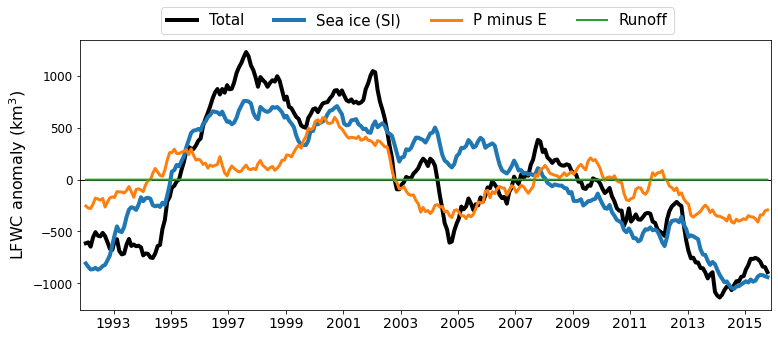

In [100]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw_anom.time,budgFw_anom.sel(region='nsea',term='tendFw')*1e-3, lw=4,color='black',label='Total')
ax.plot(oceFW_anom.time,oceFW_anom.sel(region='nsea',term='forcFwSI')*1e-3, lw=4,label='Sea ice (SI)')
ax.plot(oceFW_anom.time,oceFW_anom.sel(region='nsea',term='forcFwEP')*1e-3, lw=3,label='P minus E')
ax.plot(oceFW_anom.time,oceFW_anom.sel(region='nsea',term='forcFwRO')*1e-3, lw=2,label='Runoff')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.87, 1.15), ncol=4, fontsize=15)
plt.savefig('/mnt/efs/figure.png')
plt.show()

In [90]:
sec_SItrsp = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_SItrsp_FrS.nc').SItrsp_FrS

In [91]:
SItrsp_anom = sec_SItrsp.groupby('time.month') - sec_SItrsp.groupby('time.month').mean('time')
SItrsp_int = (SItrsp_anom.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
SItrsp_anom = SItrsp_int - SItrsp_int.mean('time')

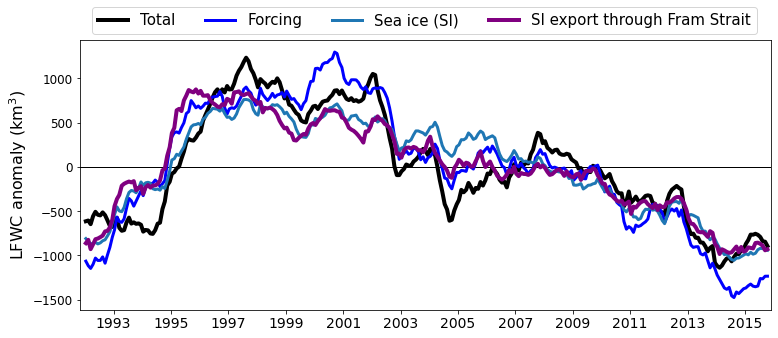

In [108]:
fig, ax = plt.subplots(figsize=(12,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgFw_anom.time,budgFw_anom.sel(region='nsea',term='tendFw')*1e-3, lw=4, color='black',label='Total')
ax.plot(budgFw_anom.time,budgFw_anom.sel(region='nsea',term='forcFw')*1e-3, lw=3, color='blue',label='Forcing')
ax.plot(oceFW_anom.time,oceFW_anom.sel(region='nsea',term='forcFwSI')*1e-3, lw=3, label='Sea ice (SI)')
ax.plot(SItrsp_anom.time,-SItrsp_anom*1e-3, lw=4, color='purple', label='SI export through Fram Strait')

ax.set_xlim([date(1991, 12, 1), date(2016, 1, 1)])
ax.set_xticks(pd.date_range('1993-01-01','2017-01-01',freq='24M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('LFWC anomaly (km$^3$)',fontsize=16)
#ax.set_ylim([-1.2, 1.2])
#ax.set_yticks(np.arange(-1.0,1.5,0.5),fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=12)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.99, 1.15), ncol=4, fontsize=15)
plt.savefig('/mnt/efs/figure.png')
plt.show()

### Map

In [58]:
#Regridding
from scipy.spatial import cKDTree
from itertools import product
import cartopy
import cmocean.cm as cmo
import shapely
import geopandas as gpd

In [59]:
# Extract Coordinates
coords = ecco.coords.to_dataset().reset_coords()

In [60]:
tree = cKDTree(list(zip(coords.XC.values.flatten(),coords.YC.values.flatten())),balanced_tree=False)

# Spatial resolution
# Note: 1/4 degree is the default resolution in lon and lat to interpolate
dx = 0.25
dy = 0.25

# Longitude/latitude of regridded data
xt = np.linspace(-180+dx/2, 180-dx/2, int(360/dx))
yt = np.linspace(-90+dx/2, 90-dx/2, int(180/dy))
x, y = zip(*product(xt, yt))

d, inds = tree.query(list(zip(x, y)), k = 1)

In [61]:
Depth = xr.DataArray(np.transpose(coords.Depth.values.flatten()[inds].reshape(len(xt), len(yt))),
                     coords=[yt,xt],dims=['lat','lon'])

In [62]:
def get_gdf_patch(coords_patch):
    # Replace each pair of points by 10 points for projected map
    geometry = []
    segments = zip(coords_patch[:-2:2], coords_patch[1:-1:2], coords_patch[2::2], 
                   coords_patch[3::2])
    
    for line in [shapely.geometry.LineString([(x1, y1), (x2, y2)]) for (x1,y1,x2,y2) in segments]:
        for length in np.linspace(0,1,11):
            geometry.append( line.interpolate(length, normalized=True) )
        
    gdf_patch = gpd.GeoDataFrame([], geometry=geometry)
    
    # Convert Points to Polygo
    gdf_patch['geometry'] = gdf_patch['geometry'].apply(lambda x: x.coords[0])
    
    gdf_patch['shape_id'] = 0
    gdf_patch = gdf_patch.groupby('shape_id')['geometry'].apply(lambda x: shapely.geometry.Polygon(x.tolist())).reset_index()
    gdf_patch = gpd.GeoDataFrame(gdf_patch, geometry = 'geometry')
    
    # Salem uses this attribute:
    gdf_patch.crs = {'init': 'epsg:4326'}
    
    return gdf_patch

In [63]:
coords_SB = [-53., 47.46182,-52., 47.46182,-51., 47.46182,-50., 47.46182,-50., 48.12596,-49., 48.12596,-48., 48.12596,
             -47., 48.12596,-46., 48.12596,-45., 48.12596,-44., 48.12596,-43., 48.12596,-42., 48.12596,-41., 48.12596,
             -40., 48.12596,-39., 48.12596,-38., 48.12596,-37., 48.12596,-36., 48.12596,-35., 48.12596,-34., 48.12596,
             -33., 48.12596,-33., 47.46182,-32., 47.46182,-31., 47.46182,-30., 47.46182,-29., 47.46182,-28., 47.46182,
             -27., 47.46182,-26., 47.46182,-26., 46.78843,-25., 46.78843,-24., 46.78843,-23., 46.78843,-22., 46.78843,
             -22., 46.105774,-21., 46.105774,-20., 46.105774,-19., 46.105774,-18., 46.105774,-18., 45.41385,
             -17., 45.41385,-16., 45.41385,-15., 45.41385,-15., 44.712654,-14., 44.712654,-13., 44.712654,
             -13., 44.0022,-12., 44.0022,-11., 44.0022,-10., 44.0022,-10., 43.282494,-9.,43.282494]
coords_SB_to_EC = [-1.,43.282494,-1.,48.78087]
coords_EC = [-5.,48.78087,-5.,50.063072]
coords_EC_to_FS = [-5.,51.917812,-3.,51.917812,-3.,56.470177]
coords_FS = [-5.0209107, 58.686825,-5.037469 , 59.2385  ,-5.0590353, 59.784798,-5.085762 , 60.325672,
             -5.1178174 , 60.861084,-6.125942 , 60.84489 ,-6.166107, 61.37257,-6.2123857, 61.894703]
coords_IF = [-7.2812705, 62.386726,-7.344147, 62.895226,-8.362914, 62.86655,-8.436943, 63.36676,-9.458087, 63.333656,
             -10.47765, 63.298805,-10.567438, 63.787502,-11.588718,63.747887,-11.691477, 64.22754,
             -12.714039, 64.18291,-13.733949, 64.13652,-13.853814, 64.6033]
coords_DeS = [-24.503857, 65.66525,-24.697086, 66.05268,-25.656406, 65.969666,-26.60553, 65.88757,-26.80609, 66.25563,
              -27.73846 , 66.169136 ,-27.949457 , 66.52263 ,-28.86185 , 66.431946 ,-29.760134 , 66.34398,
              -29.971338 , 66.6755 ,-30.843836 , 66.58435 ,-31.699657 , 66.49765,-31.904171 , 66.80529 ,
              -32.727146 , 66.71687 ,-32.934757 , 67.00616 ,-33.719128 , 66.91664]
coords_DaS = [-54.23812 , 66.30245 ,-55.23425 , 66.384575 ,-55.432312 , 65.97625 ,-56.435608 , 66.052315 ,
              -57.4459 , 66.127075 ,-58.462845 , 66.20026 ,-59.486107 , 66.27162 ,-60.515358 , 66.34096 ,
              -60.687084 , 65.90322 ,-61.71775 , 65.96633]
coords_DaS_to_HS = [-65.88552 , 66.14171 , -65.522354 , 63.298805 ]
coords_HS = [-65.74028 , 61.797977, -65.796906, 61.28634 , -65.84604 , 60.769142, -65.88795, 60.24646,
             -65.922874 , 59.71838]
coords_HS_to_LG = [-65.461975,58.910896,-60,54,-56.5,52.814613]
coords_LG_to_SB = [-56.5,48.454567,-53., 47.46182]
coords_DeS_to_FrS = [-34.48089 , 66.8355,-35.11053 , 67.57883,-20.932653 , 78.87449]
coords_FrS = [-19.186508 , 79.03997,-17.391916 , 79.19493,-15.550275 , 79.33904,-13.663382 , 79.47198,
              -11.733448 , 79.5934,-11.066698 , 79.211174,-9.158151 , 79.31644,-7.2162747 , 79.40999,
              -5.244295 , 79.49161,-3.2457807 , 79.561066,-1.224616 , 79.618164,-0.9266135 , 79.21572,
              1.0404158 , 79.2584,3.0199282 , 79.28907,5.007849 , 79.30747,7.0 , 79.31361,8.992151 , 79.30747,
              10.980072 , 79.28907]
coords_FrS_to_SvN = [16.877235 , 79.16097,16.069956,76.879066]
coords_SvN = [16.739313, 76.64243, 16.468266, 76.222755, 18.017347, 76.16335, 17.723822, 75.74302,
              17.448696, 75.31985, 18.910137, 75.25662, 18.618252, 74.83322, 18.34467, 74.40739, 19.729927, 74.3413,
              19.444464, 73.91592, 19.177204, 73.48885, 18.92733, 73.06082, 20.221594, 72.99534, 19.96517, 72.569916,
              19.726929, 72.14657, 20.968075, 72.07988, 20.731846, 71.66982, 20.513678, 71.26436, 20.307493, 70.85302,
              21.488281, 70.78876, 21.278511, 70.37436]
coords_SvN_to_SN = [21.080824 , 69.95405,20.894821 , 69.52784,7.0 , 61.499973]
coords_SN = [4.9789214 , 60.954185 ,3.9684584 , 60.95079 ,3.9770377 , 60.40301,2.9694877 , 60.398922,
             2.9789946 , 59.846252,1.9738591 , 59.84185,0.96880066 , 59.836487,0.9801969 , 59.280174,
             -0.022954563 , 59.27508,-0.012811167 , 58.714504,-1.0145311 , 58.710075,-1.0064105 , 58.145473,
             -2.00715 , 58.142113,-2.0017748 , 57.573742]
coords_SN_to_FS = [-2.5004644 , 57.28708, -3.500000, 56.736153, -4.500550, 57.284992, -5.0209107, 58.686825]
coords_LG = [-56.0, 53.69125,-55.0, 53.69125,-55.0, 54.264557,-55.0 ,54.829044,-54.0,54.829044,-54.0,55.384766,
             -53.0 , 55.384766,-53.0 , 55.931786,-52.0 , 55.931786,-52.0 , 56.470177,-51.0 , 56.470177,-51.0 , 57.0,
             -50.0 , 57.0,-49.997044 , 57.494728,-48.9972 , 57.491325,-48.98871 , 57.978825,-47.98942 , 57.972424,
             -46.990215,57.96642,-46.9778, 58.443645,-45.979767, 58.435368,-45.9637, 58.905373,-44.967514, 58.89538,
             -44.94873 , 59.35802,-43.955177 , 59.346916,-43.93474 , 59.802036]
coords_LG_to_DaS = [-43.808777 , 61.561226,-53.250584 , 66.21951]

In [64]:
#coords_spna = [-9.4, 50,-56.8, 50,-67.5, 62.3,-61.6, 66.7,-35, 66.7,-22.1, 66.1,-3.8, 59,-9.4, 50]
coords_spna = coords_SB+coords_SB_to_EC+coords_EC+coords_EC_to_FS+coords_FS+coords_IF+coords_DeS+coords_DaS+\
                coords_DaS_to_HS+coords_HS+coords_HS_to_LG+coords_LG_to_SB

#coords_nsea = [-3.8, 59,-22.1, 66.1,-35, 66.7,-29, 70,-25, 80,20, 80,20, 70,11, 64,5, 60,-3.8,59]
coords_nsea = coords_FS+coords_IF+coords_DeS+coords_DeS_to_FrS+coords_FrS+coords_FrS_to_SvN+coords_SvN+\
                coords_SvN_to_SN+coords_SN+coords_SN_to_FS

coords_lsea = coords_DaS+coords_DaS_to_HS+coords_HS+coords_HS_to_LG+coords_LG+coords_LG_to_DaS

In [65]:
gdf_spna = get_gdf_patch(coords_spna)
gdf_nsea = get_gdf_patch(coords_nsea)
gdf_lsea = get_gdf_patch(coords_lsea)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https:

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


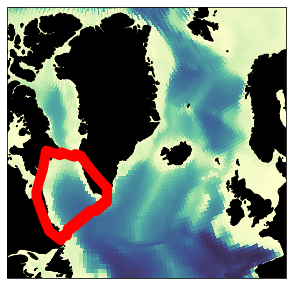

In [66]:
fig = plt.figure(figsize=[5, 6])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-68, 0, 45, 83], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='k',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)
p = ax.pcolormesh(Depth.lon-0.125, Depth.lat-0.125, Depth, vmin=0, vmax=5400, cmap=cmo.deep,
                  transform=cartopy.crs.PlateCarree(), zorder=0)

ax.add_geometries([gdf_lsea['geometry'][0]], cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', 
                    linewidth=10, linestyle='-', zorder=3)

plt.savefig('/mnt/efs/figure.png')
plt.show()

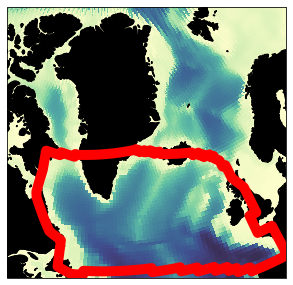

In [50]:
fig = plt.figure(figsize=[5, 6])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-68, 0, 45, 83], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='k',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)
p = ax.pcolormesh(Depth.lon-0.125, Depth.lat-0.125, Depth, vmin=0, vmax=5400, cmap=cmo.deep,
                  transform=cartopy.crs.PlateCarree(), zorder=0)

ax.add_geometries([gdf_spna['geometry'][0]], cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', 
                    linewidth=10, linestyle='-', zorder=3)

plt.savefig('/mnt/efs/figure.png')
plt.show()

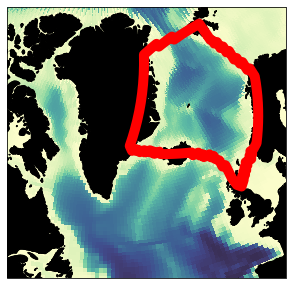

In [51]:
fig = plt.figure(figsize=[5, 6])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-68, 0, 45, 83], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='k',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)
p = ax.pcolormesh(Depth.lon-0.125, Depth.lat-0.125, Depth, vmin=0, vmax=5400, cmap=cmo.deep,
                  transform=cartopy.crs.PlateCarree(), zorder=0)

ax.add_geometries([gdf_nsea['geometry'][0]], cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', 
                    linewidth=10, linestyle='-', zorder=3)

plt.savefig('/mnt/efs/figure.png')
plt.show()